In [1]:
# ✅ Step 1: Import Required Libraries
import pandas as pd  # Data handling
import numpy as np   # Numerical operations
import seaborn as sns  # Data visualization
import matplotlib.pyplot as plt  # Plotting graphs
from sklearn.model_selection import train_test_split  # Splitting data
from sklearn.preprocessing import LabelEncoder, StandardScaler  # Encoding & Scaling
from sklearn.linear_model import LogisticRegression  # ML model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report  # Model evaluation

In [2]:
csv_path = "datasets/students_placement.csv"
df = pd.read_csv(csv_path)
print(df.head())


   StudentID  CGPA  Internships  Projects  Workshops/Certifications  \
0          1   7.5            1         1                         1   
1          2   8.9            0         3                         2   
2          3   7.3            1         2                         2   
3          4   7.5            1         1                         2   
4          5   8.3            1         2                         2   

   AptitudeTestScore  SoftSkillsRating ExtracurricularActivities  \
0                 65               4.4                        No   
1                 90               4.0                       Yes   
2                 82               4.8                       Yes   
3                 85               4.4                       Yes   
4                 86               4.5                       Yes   

  PlacementTraining  SSC_Marks  HSC_Marks PlacementStatus  
0                No         61         79       NotPlaced  
1               Yes         78         82   

✅ Step 2: Exploratory Data Analysis (EDA) & Preprocessing 🔍

In [3]:
print("---Information Section---")
print(df.info())
print("\n---Describe section---")
print(df.describe())

---Information Section---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   StudentID                  10000 non-null  int64  
 1   CGPA                       10000 non-null  float64
 2   Internships                10000 non-null  int64  
 3   Projects                   10000 non-null  int64  
 4   Workshops/Certifications   10000 non-null  int64  
 5   AptitudeTestScore          10000 non-null  int64  
 6   SoftSkillsRating           10000 non-null  float64
 7   ExtracurricularActivities  10000 non-null  object 
 8   PlacementTraining          10000 non-null  object 
 9   SSC_Marks                  10000 non-null  int64  
 10  HSC_Marks                  10000 non-null  int64  
 11  PlacementStatus            10000 non-null  object 
dtypes: float64(2), int64(7), object(3)
memory usage: 937.6+ KB
None

---Describe 

In [4]:
df = df.drop_duplicates()

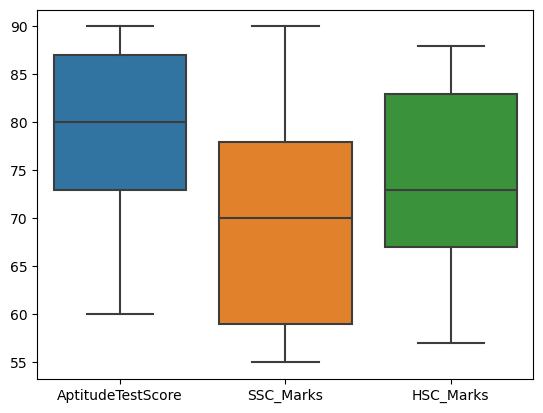

In [5]:
sns.boxplot(df[['AptitudeTestScore', 'SSC_Marks', 'HSC_Marks']])
plt.show()

In [6]:
#Categorical data encoding (Placement Status, Placement Training, Extracurricular Activities)

le = LabelEncoder()
df['PlacementStatus'] = le.fit_transform(df['PlacementStatus'])  # Placed (1), Not Placed (0)
df['PlacementTraining'] = le.fit_transform(df['PlacementTraining'])  # Yes (1), No (0)
df['ExtracurricularActivities'] = le.fit_transform(df['ExtracurricularActivities'])  # Yes (1), No (0)

# Print first 5 rows to check encoding
print(df[['PlacementStatus', 'PlacementTraining', 'ExtracurricularActivities']].head())

   PlacementStatus  PlacementTraining  ExtracurricularActivities
0                0                  0                          0
1                1                  1                          1
2                0                  0                          1
3                1                  1                          1
4                1                  1                          1


In [7]:
# Initialize StandardScaler
scaler = StandardScaler()

# Select numerical columns
numerical_cols = ['CGPA', 'Internships', 'Projects', 'Workshops/Certifications',
                  'AptitudeTestScore', 'SoftSkillsRating', 'SSC_Marks', 'HSC_Marks']

# Fit the scaler on the numerical columns
scaler.fit(df[numerical_cols])

# Print mean and standard deviation
# Calculate mean and standard deviation
means = df[numerical_cols].mean()
std_devs = df[numerical_cols].std()

# Print in sorted format
print("🔹 Mean Values:")
for col, mean in means.items():
    print(f"{col} mean = {mean:.1f}")

print("\n🔹 Standard Deviation Values:")
for col, std in std_devs.items():
    print(f"{col} std deviation = {std:.1f}")

🔹 Mean Values:
CGPA mean = 7.7
Internships mean = 1.0
Projects mean = 2.0
Workshops/Certifications mean = 1.0
AptitudeTestScore mean = 79.4
SoftSkillsRating mean = 4.3
SSC_Marks mean = 69.2
HSC_Marks mean = 74.5

🔹 Standard Deviation Values:
CGPA std deviation = 0.6
Internships std deviation = 0.7
Projects std deviation = 0.9
Workshops/Certifications std deviation = 0.9
AptitudeTestScore std deviation = 8.2
SoftSkillsRating std deviation = 0.4
SSC_Marks std deviation = 10.4
HSC_Marks std deviation = 8.9


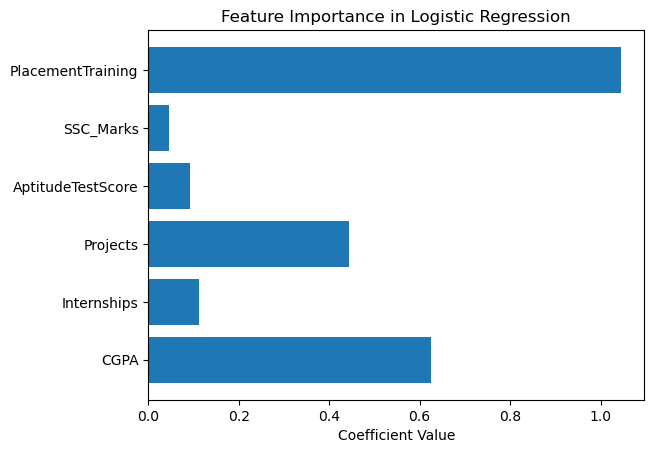

In [12]:
importance = model.coef_[0]
feature_names = X.columns
plt.barh(feature_names, importance)
plt.xlabel("Coefficient Value")
plt.title("Feature Importance in Logistic Regression")
plt.show()

✅ Step 3: Data Splitting ✂️


In [9]:
le = LabelEncoder()
df['PlacementTraining'] = le.fit_transform(df['PlacementTraining'])  # Yes → 1, No → 0
df['ExtracurricularActivities'] = le.fit_transform(df['ExtracurricularActivities'])  # Yes → 1, No → 0
df['PlacementStatus'] = le.fit_transform(df['PlacementStatus'])  # Placed → 1, Not Placed → 0

# Final Feature Selection
X = df[['CGPA', 'Internships', 'Projects', 'AptitudeTestScore',
        'SSC_Marks', 'PlacementTraining']]

y = df['PlacementStatus']

# Standardize Numerical Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert Scaled Data Back to DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Print Sorted Mean & Std Deviation
means = X.mean().sort_values()
std_devs = X.std().sort_values()

# Display First 5 Rows of Scaled Data
print("\n📌 **First 5 Rows of Scaled Data:**")
print(X_scaled_df.head())


📌 **First 5 Rows of Scaled Data:**
       CGPA  Internships  Projects  AptitudeTestScore  SSC_Marks  \
0 -0.309343    -0.073889 -1.182822          -1.770910  -0.782306   
1  1.877818    -1.575689  1.121526           1.292970   0.847618   
2 -0.621794    -0.073889 -0.030648           0.312528   0.943496   
3 -0.309343    -0.073889 -1.182822           0.680194   1.135251   
4  0.940464    -0.073889 -0.030648           0.802749   0.464106   

   PlacementTraining  
0          -1.651836  
1           0.605387  
2          -1.651836  
3           0.605387  
4           0.605387  


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Train dataset size:", len(X_train))
print("Test dataset size:", len(X_test))
print("Total dataset size:", df.shape[0])

Train dataset size: 8000
Test dataset size: 2000
Total dataset size: 10000


In [11]:
#✅ Step 4: Choose & Train Logistic Regression Model 🤖
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [13]:
print("Number of test samples:", len(y_test))
print("Duplicate rows in dataset:", df.duplicated().sum())

Number of test samples: 2000
Duplicate rows in dataset: 0


In [14]:
y_pred = model.predict(X_test)
print(y_pred)

[0 0 0 ... 1 1 0]


In [15]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Model Predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Accuracy for Train & Test
print(f"📌 Train Accuracy: {accuracy_score(y_train, y_train_pred):.2f}")
print(f"📌 Test Accuracy: {accuracy_score(y_test, y_test_pred):.2f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)
print("\nConfusion Matrix:\n", cm)

# Extract values
TN, FP, FN, TP = cm.ravel()

print(f"\n✅ {TN} (True Negatives - TN): Students not placed, correctly predicted as 'Not Placed'.")
print(f"❌ {FP} (False Positives - FP): Students not placed, but wrongly predicted as 'Placed'.")
print(f"❌ {FN} (False Negatives - FN): Students placed but wrongly predicted as 'Not Placed'.")
print(f"✅ {TP} (True Positives - TP): Students placed, correctly predicted as 'Placed'.\n")

# Generate Classification Report
report_dict = classification_report(y_test, y_test_pred, target_names=["Not Placed", "Placed"], output_dict=True)

# Display classification report with explanations
print("📌 **Classification Report (With Explanation)** 📌\n")

for label, metrics in report_dict.items():
    if label in ["Not Placed", "Placed"]:  # Ignore avg/total rows
        print(f"🔹 **Class: {label}**")
        print(f"   - 🎯 Precision: {metrics['precision']:.2f} (Correct 'Placed' predictions out of total 'Placed' predictions)")
        print(f"   - 📊 Recall: {metrics['recall']:.2f} (Correctly found actual 'Placed' students.)")
        print(f"   - 🔄 F1-Score: {metrics['f1-score']:.2f} (Balance of Precision & Recall)")
        print(f"   - 🏆 Support: {metrics['support']} (Total students in this category)\n")

📌 Train Accuracy: 0.79
📌 Test Accuracy: 0.79

Confusion Matrix:
 [[964 208]
 [214 614]]

✅ 964 (True Negatives - TN): Students not placed, correctly predicted as 'Not Placed'.
❌ 208 (False Positives - FP): Students not placed, but wrongly predicted as 'Placed'.
❌ 214 (False Negatives - FN): Students placed but wrongly predicted as 'Not Placed'.
✅ 614 (True Positives - TP): Students placed, correctly predicted as 'Placed'.

📌 **Classification Report (With Explanation)** 📌

🔹 **Class: Not Placed**
   - 🎯 Precision: 0.82 (Correct 'Placed' predictions out of total 'Placed' predictions)
   - 📊 Recall: 0.82 (Correctly found actual 'Placed' students.)
   - 🔄 F1-Score: 0.82 (Balance of Precision & Recall)
   - 🏆 Support: 1172.0 (Total students in this category)

🔹 **Class: Placed**
   - 🎯 Precision: 0.75 (Correct 'Placed' predictions out of total 'Placed' predictions)
   - 📊 Recall: 0.74 (Correctly found actual 'Placed' students.)
   - 🔄 F1-Score: 0.74 (Balance of Precision & Recall)
   - 🏆 Su

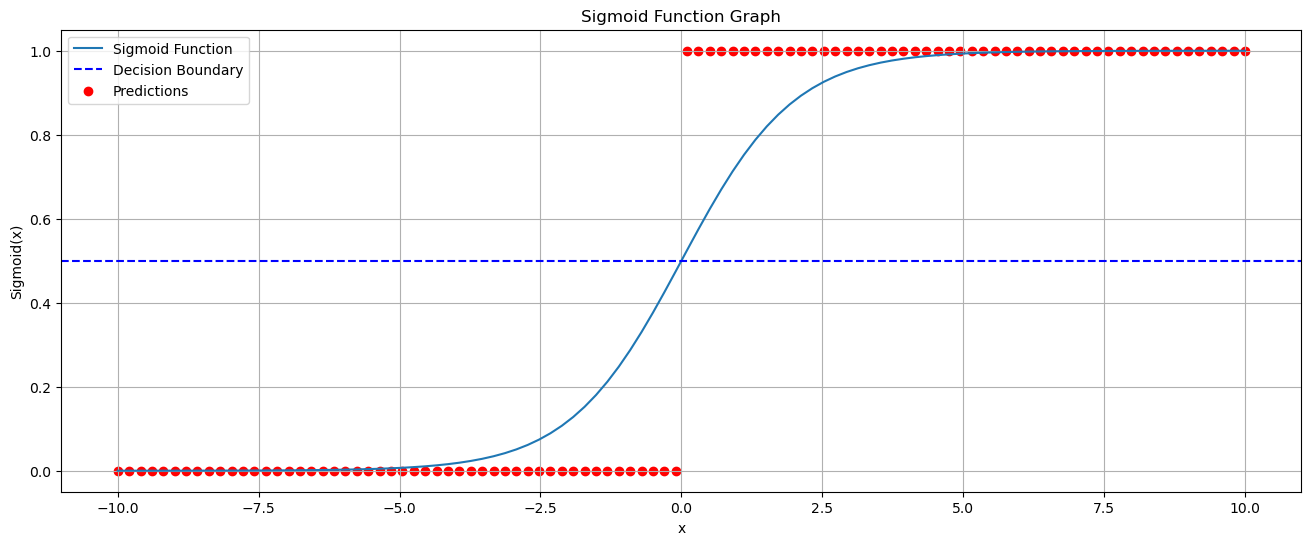

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Define sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Generate values for x
x = np.linspace(-10, 10, 100)
y = sigmoid(x)

# Set figure size
plt.figure(figsize=(16, 6))  # Increasing frame width

# Plot the sigmoid function
plt.plot(x, y, label='Sigmoid Function')
plt.axhline(y=0.5, color='blue', linestyle='--', label='Decision Boundary')  # Decision boundary
plt.xlabel('x')
plt.ylabel('Sigmoid(x)')
plt.title('Sigmoid Function Graph')
plt.legend()
plt.grid()

# Actual predictions based on sigmoid output
y_pred = (y >= 0.5).astype(int)  # Applying threshold to sigmoid output
plt.scatter(x, y_pred, color='red', label='Predictions')
plt.legend()
plt.show()